In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("data/emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [27]:
#!pip3 install tweet-preprocessor
import preprocessor as p

In [28]:
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text

In [29]:
df['Tweet'] = df.apply(preprocess_tweet, axis=1)

In [30]:
df.head()

,Tweet,Label
0,A little throwback with my favourite person Wa...,0
1,"glam on yesterday for makeup using in ,",7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO Walt Disney Magic Kingdom,0
4,Who never... A Galaxy Far Far Away,2


In [31]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

/var/folders/p6/9vz93_jn0w35pcs_knjyd76r0000gn/T/ipykernel_8227/635331636.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [32]:
df.head()

,Tweet,Label
0,a little throwback with my favourite person wa...,0
1,glam on yesterday for makeup using in,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [33]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49728, 2)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')

In [35]:
X = vectorizer.fit_transform(df.Tweet)

In [36]:
print(X)

  (0, 31887)	0.440785585969007
  (0, 32017)	0.4166548259037178
  (0, 22435)	0.38384848608207606
  (0, 10413)	0.48958073530878615
  (0, 29858)	0.40809875497360226
  (0, 17458)	0.2802378860702172
  (1, 31242)	0.5169740960355811
  (1, 18246)	0.47448702441274915
  (1, 33125)	0.4002222061398111
  (1, 12033)	0.5894251720148296
  (2, 20660)	0.34416586331701005
  (2, 20480)	0.42320250303198714
  (2, 21662)	0.44032322233769183
  (2, 28536)	0.3353983141245039
  (2, 31861)	0.33452766700488157
  (2, 22889)	0.3138287587083422
  (2, 8094)	0.4309010105849864
  (3, 16245)	0.38021261057818
  (3, 18172)	0.3616905164919625
  (3, 8477)	0.3274281842303735
  (3, 31903)	0.40074368574789215
  (3, 31604)	0.6342455123488825
  (3, 1191)	0.2335513939311894
  (4, 2030)	0.3713801203093438
  (4, 10328)	0.7943521206520225
  :	:
  (49722, 1191)	0.21105123485054328
  (49723, 24882)	0.629812469099679
  (49723, 5428)	0.66911947804223
  (49723, 20633)	0.2929187173495842
  (49723, 17780)	0.264223395817505
  (49724, 21336)	

In [37]:
y = df["Label"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [39]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=101)
X_train,y_train = os.fit_resample(X_train, y_train)

In [40]:
X.getnnz()

271958

In [41]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (170820, 33449)
Training y Dim  (170820,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.10124673235471546

In [43]:
print(type(X_test))
print(type(y_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [44]:
knn_cv = cross_val_score(knn, X, y, cv=5)
knn_cv.mean()
knn_cv

array([0.19334406, 0.18841745, 0.19334406, 0.18662645, 0.18320764])

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = knn.predict(X_test)
print(type(y_predict))
y_predict

<class 'numpy.ndarray'>


array([12,  9,  7, ...,  7,  4, 19])

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.14      0.00      0.00      2128
           1       0.20      0.07      0.10      1024
           2       0.34      0.15      0.20      1062
           3       0.12      0.04      0.06       589
           4       0.13      0.22      0.16       487
           5       0.08      0.13      0.10       476
           6       0.06      0.14      0.09       400
           7       0.09      0.19      0.12       374
           8       0.09      0.14      0.11       390
           9       0.07      0.09      0.08       335
          10       0.04      0.06      0.05       299
          11       0.12      0.34      0.18       294
          12       0.16      0.25      0.20       285
          13       0.05      0.11      0.07       255
          14       0.02      0.01      0.01       269
          15       0.05      0.12      0.07       261
          16       0.05      0.04      0.04       265
          17       0.40    

In [47]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Doğru Etiketler')
    plt.xlabel('Tahmini Etiketler')
    plt.tight_layout()

Normalized confusion matrix


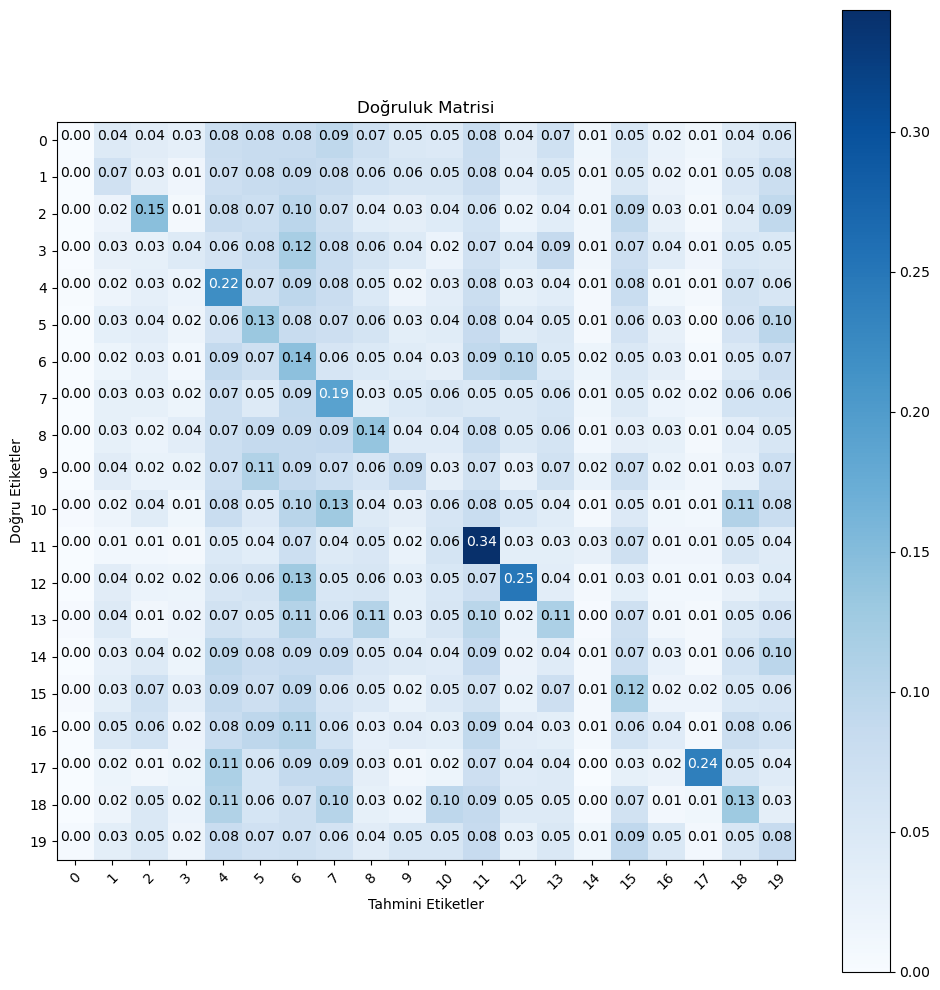

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğruluk Matrisi', normalize=True)